In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV
import keras
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

import warnings

warnings.filterwarnings(action='ignore')

physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [2]:
datos = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv', low_memory=False
)

resultados = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv', low_memory=False
)

df = pd.merge(datos, resultados, how='left', left_on='id', right_on='id')
df

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,...,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,...,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,...,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,...,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,...,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,118424,no,8.4,...,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0,no
116364,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,87436,no,7.4,...,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0,si
116365,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,116306,no,NaN,...,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0,no
116366,Villa Devoto,2010-08-17,Sursuroeste,NaN,NaN,71.0,99.0,112204,no,NaN,...,1005.2,Sursuroeste,43.0,16.5,5.0,13.6,11.4,26.0,0.0,si


#División de los datos

In [3]:
df = df.dropna(subset=['llovieron_hamburguesas_al_dia_siguiente'])
df.reset_index()

datos_1 = df.iloc[:, :23]
resultados_1 = df.iloc[:,23:]

X_training_val_dev, X_test_holdout, y_training_val_dev, y_test_holdout = train_test_split(
    datos_1, resultados_1, random_state=117, test_size=0.1, stratify=resultados_1
)
X_training, X_val_dev, y_training, y_val_dev = train_test_split(
    X_training_val_dev, y_training_val_dev, random_state=117, test_size=0.2, stratify=y_training_val_dev
)


print("Shape of new dataframes - {} , {}".format(X_training.shape, y_training.shape))
datos_training = X_training.copy()
datos_test_holdout = X_test_holdout.copy()
datos_training

Shape of new dataframes - (81884, 23) , (81884, 1)


,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
39061,Parque Patricios,2012-08-05,Oestesuroeste,Noroeste,5.8,69.0,82.0,76262,si,0.0,...,1006.8,1005.1,Oeste,83.0,12.5,8.3,9.5,10.3,50.0,24.0
35264,Belgrano,2014-06-14,Oeste,Noroeste,NaN,76.0,97.0,13968,NaN,NaN,...,1013.6,1015.7,Oeste,28.0,16.7,13.0,15.8,13.2,13.0,9.0
61356,Recoleta,2009-08-29,Oestesuroeste,Oeste,1.5,94.0,97.0,81238,si,1.4,...,999.6,999.9,Oeste,57.0,13.8,10.5,10.1,10.7,28.0,7.0
65160,Villa General Mitre,2011-05-29,Nornoreste,Nornoreste,6.6,28.0,34.0,115468,NaN,NaN,...,1011.3,1014.7,Nornoreste,54.0,25.8,7.5,24.9,19.9,37.0,7.0
84508,Chacarita,2015-02-21,Este,Este,11.1,58.0,67.0,23272,no,8.0,...,1017.2,1019.3,Este,50.0,26.1,20.4,24.3,22.7,35.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26036,Almagro,2014-01-14,Nornoreste,Norte,NaN,33.0,62.0,4790,no,NaN,...,1018.1,1022.1,Estenoreste,35.0,33.9,14.7,32.2,22.4,13.0,13.0
20182,Agronomía,2012-08-21,Noreste,Sureste,NaN,45.0,84.0,1329,no,NaN,...,1015.3,1020.1,Norte,33.0,16.4,2.1,15.6,7.9,19.0,7.0
2036,Parque Patricios,2012-06-05,Sureste,Sursureste,0.9,66.0,63.0,76201,si,0.6,...,1020.6,1019.7,Sureste,59.0,12.6,10.7,12.0,11.6,31.0,30.0
12108,La Paternal,2014-07-30,Oestenoroeste,Noroeste,NaN,34.0,47.0,44525,NaN,NaN,...,1014.2,1017.1,Oestenoroeste,96.0,22.4,12.7,22.2,19.1,19.0,11.0


#Preprocessing

In [4]:
from preprocessing import preprocessing_mean

#Heatmap

In [5]:
df['llovieron_hamburguesas_al_dia_siguiente'] = pd.get_dummies(df['llovieron_hamburguesas_al_dia_siguiente'], drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])
heatmap_df = preprocessing_mean(df.copy())

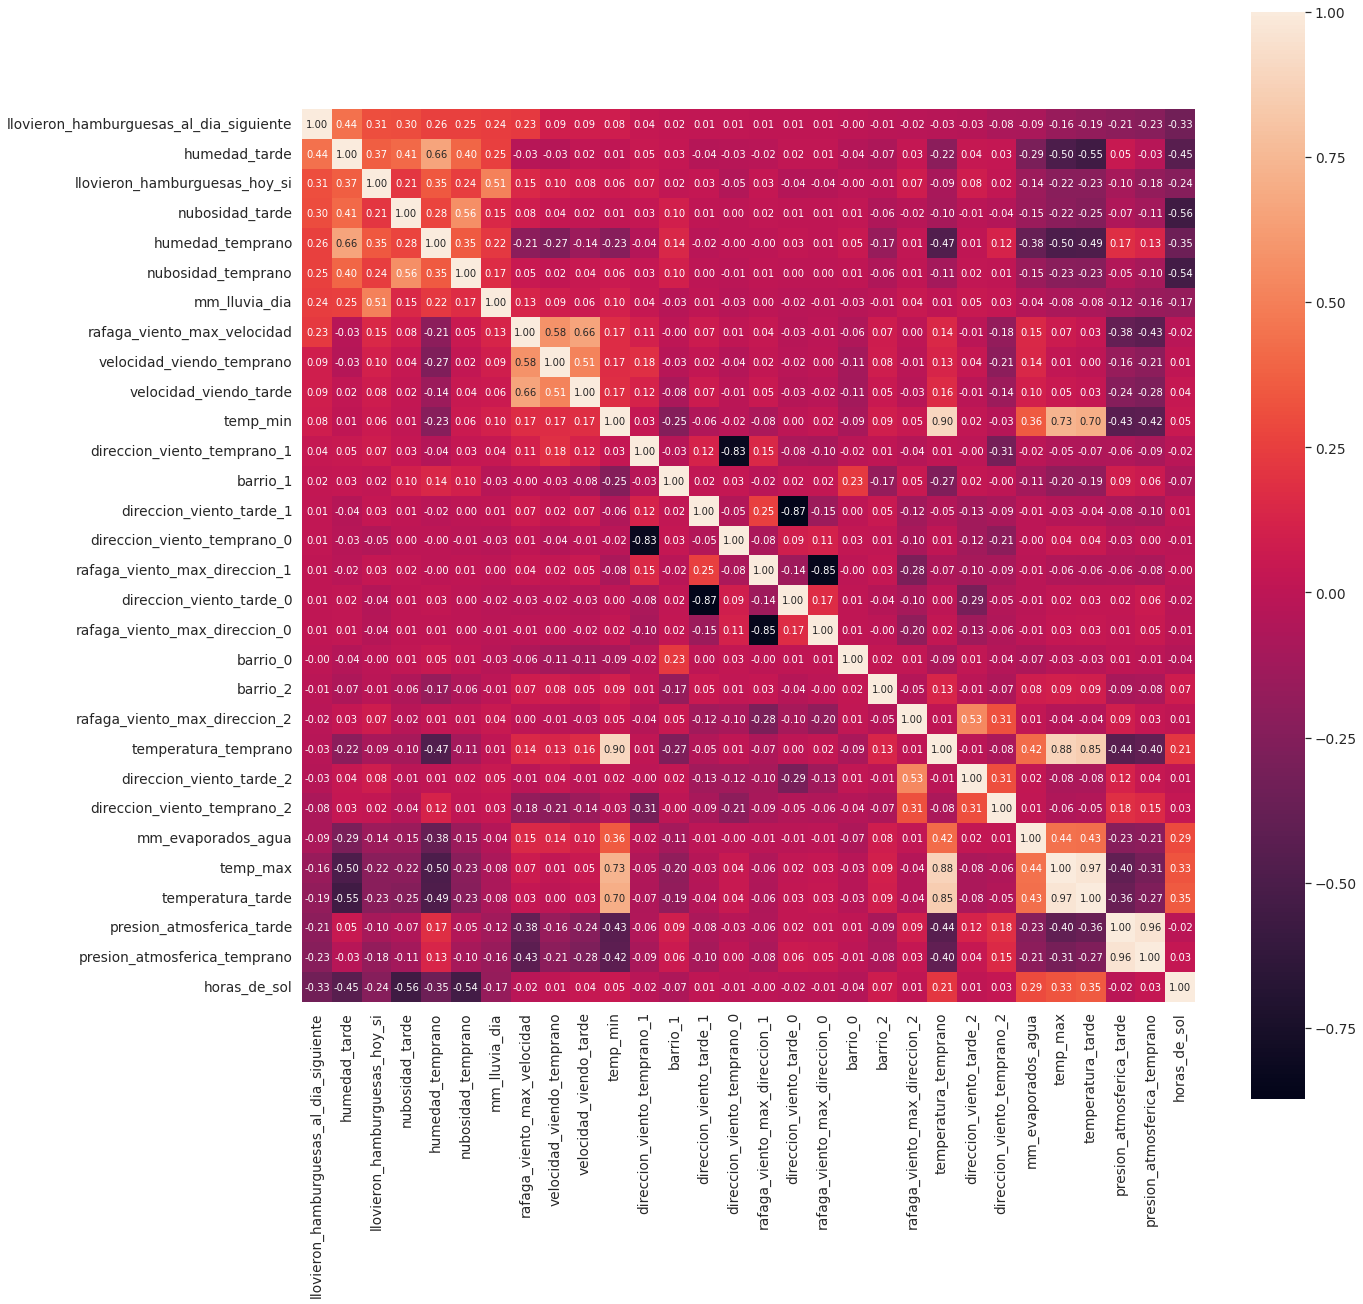

In [6]:
corrmat = heatmap_df.corr()
k = 33  # number of variables for heatmap
cols = corrmat.nlargest(k, 'llovieron_hamburguesas_al_dia_siguiente')['llovieron_hamburguesas_al_dia_siguiente'].index
cm = np.corrcoef(heatmap_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

Hago un heatmap para tener una idea de la correlación entre las variables. Mirando la primera fila, vemos que el target tiene correlación positiva con la variable humedad_tarde mientras que tiene correlación negativa con horas de sol y presion_atmosferica_tarde

In [5]:
datos_training_rn, datos_val_dev_rn = preprocessing_mean(datos_training.copy(), X_val_dev.copy())

y_training = y_training.reset_index()
y_training = y_training.drop(columns=['index'])
resultados_training_rn = pd.get_dummies(y_training, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])
resultados_val_dev_rn = y_val_dev.copy()
resultados_val_dev_rn = pd.get_dummies(y_val_dev, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

datos_training_rn

,dia,horas_de_sol,humedad_tarde,humedad_temprano,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,...,direccion_viento_tarde_1,direccion_viento_tarde_2,direccion_viento_temprano_0,direccion_viento_temprano_1,direccion_viento_temprano_2,rafaga_viento_max_direccion_0,rafaga_viento_max_direccion_1,rafaga_viento_max_direccion_2,año,mes
0,05,5.800000,69.0,82.0,0.000000,6.800000,7.000000,8.000000,1006.799988,1005.1,...,8.0,0.0,-2.0,5.0,-1.0,-2.0,3.0,0.0,2012,08
1,14,7.641429,76.0,97.0,5.466639,2.342146,7.000000,8.000000,1013.599976,1015.7,...,3.0,0.0,-2.0,5.0,-1.0,-2.0,3.0,0.0,2014,06
2,29,1.500000,94.0,97.0,1.400000,6.600000,4.494635,4.431395,999.599976,999.9,...,8.0,0.0,-2.0,3.0,0.0,-2.0,3.0,0.0,2009,08
3,29,6.600000,28.0,34.0,5.466639,2.342146,4.494635,4.431395,1011.299988,1014.7,...,6.0,-1.0,-3.0,6.0,-1.0,-3.0,6.0,-1.0,2011,05
4,21,11.100000,58.0,67.0,8.000000,0.000000,2.000000,3.000000,1017.200012,1019.3,...,1.0,0.0,-1.0,1.0,0.0,-1.0,1.0,0.0,2015,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81879,14,7.641429,33.0,62.0,5.466639,0.000000,4.494635,4.431395,1018.099976,1022.1,...,6.0,-1.0,-1.0,3.0,-1.0,-4.0,5.0,0.0,2014,01
81880,21,7.641429,45.0,84.0,5.466639,0.000000,1.000000,2.000000,1015.299988,1020.1,...,4.0,-1.0,-3.0,4.0,0.0,-1.0,3.0,-1.0,2012,08
81881,05,0.900000,66.0,63.0,0.600000,11.800000,7.000000,8.000000,1020.599976,1019.7,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2012,06
81882,30,7.641429,34.0,47.0,5.466639,2.342146,1.000000,4.431395,1014.200012,1017.1,...,8.0,0.0,-2.0,5.0,-1.0,-5.0,8.0,0.0,2014,07


#Regresión

In [6]:
linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(
        LinearRegression(), datos_training_rn, resultados_training_rn, scoring="neg_mean_squared_error", cv=5
    )
)
rmse.mean()

0.34375622572603876

Hago una regresión para luego comparar con ridge y lasso para seleccionar los features mas importantes.

In [9]:
linreg = LinearRegression()
linreg.fit(datos_training_rn, resultados_training_rn)
linreg.coef_[0]


array([-0.0001313 , -0.01834205,  0.00835734, -0.00057178,  0.00186624,
        0.00241787,  0.01196484, -0.00255013, -0.02503244,  0.01726437,
        0.00750844, -0.00187989, -0.00180574,  0.00578554, -0.00111019,
       -0.00468865, -0.00039633,  0.10015296,  0.00337527,  0.00148314,
       -0.00070097,  0.02829372,  0.01857366,  0.02991865, -0.02718123,
       -0.01841073, -0.05261218,  0.0101606 ,  0.00681939,  0.00989575,
       -0.0001582 ,  0.00105644])

In [10]:
coeficientes = pd.DataFrame(
    {'Feature': datos_training_rn.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])



,Feature,Beta
26,direccion_viento_temprano_2,-0.052612
24,direccion_viento_temprano_0,-0.027181
8,presion_atmosferica_tarde,-0.025032
25,direccion_viento_temprano_1,-0.018411
1,horas_de_sol,-0.018342
15,velocidad_viendo_tarde,-0.004689
7,nubosidad_temprano,-0.002550
11,temp_max,-0.001880
12,temp_min,-0.001806
14,temperatura_temprano,-0.001110


Text(0.5, 1.0, 'Coeficientes')

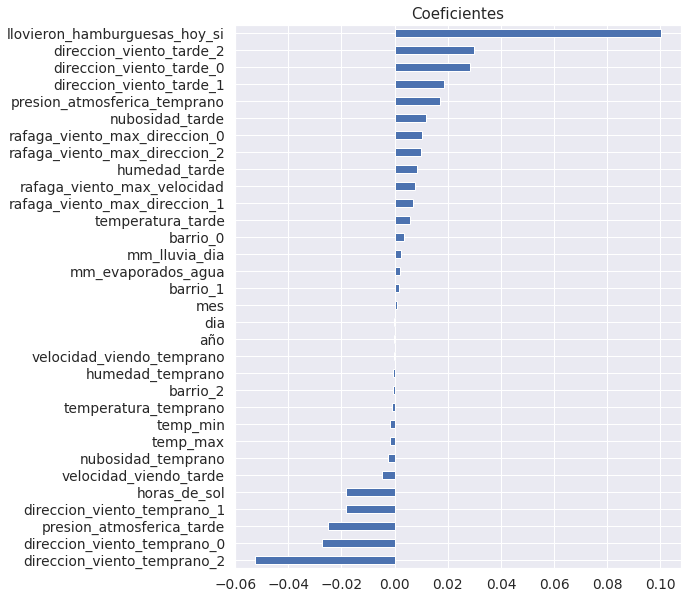

In [11]:
coef = pd.Series(linreg.coef_[0], index=datos_training_rn.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes")

Con la regresion nos da que los features mas importantes son llovieron_hamburguesas_hoy y direccion_viento_temprano_2. En el analisis del TP1 llegamos a una conclusion distinta y en el heatmap anterior tampoco veiamos reflejado esto. Por ende sospechamos de la eficacia de este modelo.

#Ridge

In [7]:
scaler = preprocessing.StandardScaler()

scaler.fit(datos_training_rn)
scaled_df = scaler.transform(datos_training_rn)
names = datos_training_rn.columns
scaled_datos_training_rn = pd.DataFrame(scaled_df, columns=names)
scaled_datos_training_rn .describe()



,dia,horas_de_sol,humedad_tarde,humedad_temprano,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,...,direccion_viento_tarde_1,direccion_viento_tarde_2,direccion_viento_temprano_0,direccion_viento_temprano_1,direccion_viento_temprano_2,rafaga_viento_max_direccion_0,rafaga_viento_max_direccion_1,rafaga_viento_max_direccion_2,año,mes
count,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,...,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04,8.188400e+04
mean,-9.757771e-17,-3.129949e-16,-6.529767e-17,9.458399e-17,-1.575821e-16,-3.627166e-17,-8.746850e-17,-4.052360e-16,3.321720e-15,1.088323e-15,...,1.924654e-16,3.149907e-17,-7.219622e-17,1.273847e-16,2.017503e-18,1.719867e-16,-2.070435e-16,1.427437e-17,6.884326e-15,-3.748650e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.668172e+00,-2.798943e+00,-2.519201e+00,-3.650941e+00,-1.734041e+00,-2.795441e-01,-2.133367e+00,-1.945244e+00,-5.714328e+00,-5.289250e+00,...,-2.263218e+00,-1.521766e+00,-1.747028e+00,-1.989043e+00,-1.358462e+00,-1.653650e+00,-1.990782e+00,-1.503437e+00,-2.265755e+00,-1.575447e+00
25%,-8.729092e-01,-3.253267e-16,-7.103327e-01,-6.296880e-01,-4.652241e-01,-2.795441e-01,-2.347774e-01,-6.283377e-01,-6.374648e-01,-6.164018e-01,...,-8.159228e-01,-1.521766e+00,-9.627343e-01,-6.318505e-01,-1.358462e+00,-8.840358e-01,-6.587644e-01,-1.503437e+00,-6.924080e-01,-9.923192e-01
50%,3.596239e-02,-3.253267e-16,0.000000e+00,5.936961e-02,0.000000e+00,-2.795441e-01,0.000000e+00,-3.898826e-16,-7.253532e-06,-1.686481e-14,...,1.489409e-01,5.116591e-01,-1.784402e-01,2.729446e-01,4.135784e-01,-1.144214e-01,2.292472e-01,3.626472e-01,9.426556e-02,-1.176275e-01
75%,8.312251e-01,3.877388e-01,6.585410e-01,7.484272e-01,0.000000e+00,-1.840611e-01,7.145172e-01,6.885688e-01,6.205219e-01,6.148566e-01,...,6.313728e-01,5.116591e-01,6.058538e-01,7.253422e-01,4.135784e-01,6.551929e-01,6.732530e-01,3.626472e-01,8.809392e-01,7.570641e-01
max,1.740097e+00,2.512193e+00,2.369633e+00,1.649503e+00,2.440359e+01,4.359492e+01,1.663812e+00,2.005475e+00,3.645664e+00,3.463069e+00,...,1.596236e+00,2.545084e+00,1.390148e+00,1.630137e+00,2.185618e+00,1.424807e+00,1.561265e+00,2.228732e+00,1.667613e+00,1.631756e+00


In [8]:
def rmse_cv(model, X_train, y_train):
    rmse = np.sqrt(
        -cross_val_score(
            model, X_train, y_train, scoring="neg_mean_squared_error", cv=5
        )
    )
    return rmse

In [9]:
alphas = [
    0.00001,
    0.0001,
    0.001,
    0.005,
    0.01,
    0.05,
    0.1,
    0.3,
    1,
    3,
    5,
    10,
    15
]
cv_ridge = [rmse_cv(Ridge(alpha=alpha), scaled_datos_training_rn, resultados_training_rn).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

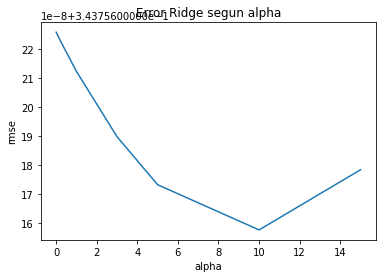

In [10]:
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot(title="Error Ridge segun alpha")
plt.xlabel("alpha")
plt.ylabel("rmse")


In [11]:
cv_ridge.min()

0.34375615754581373

Vemos que con Ridge el error minimo disminuyó muy poco comparado con la regresión. Este error minimo se alcanza con alpha = 10

In [12]:
ridge = Ridge(alpha=10)
ridge.fit(scaled_datos_training_rn, resultados_training_rn)


coeficientes = pd.DataFrame(
    {'Feature': scaled_datos_training_rn.columns, 'Beta': ridge.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

,Feature,Beta
8,presion_atmosferica_tarde,-0.166485
1,horas_de_sol,-0.050077
15,velocidad_viendo_tarde,-0.040909
25,direccion_viento_temprano_1,-0.040519
24,direccion_viento_temprano_0,-0.034486
26,direccion_viento_temprano_2,-0.029603
11,temp_max,-0.013181
12,temp_min,-0.011612
3,humedad_temprano,-0.010730
14,temperatura_temprano,-0.007179


Text(0.5, 1.0, 'Coeficientes en el Modelo Ridge ')

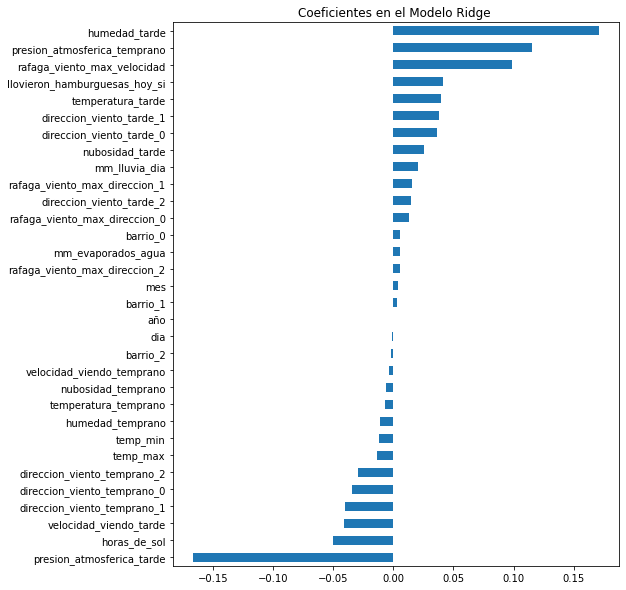

In [13]:
coef = pd.Series(ridge.coef_[0], index=scaled_datos_training_rn.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Ridge ")

Aca notamos que los features mas importantes son humedad_tarde, presion_atmosferica_temprano, rafaga_viento_max_velocidad, presion_atmosferica_tarde y horas_de_sol. Estos features son coherentes con el analisis del TP1 y mas coherentes con el heatmap del principio.

#Lasso

Text(0, 0.5, 'rmse')

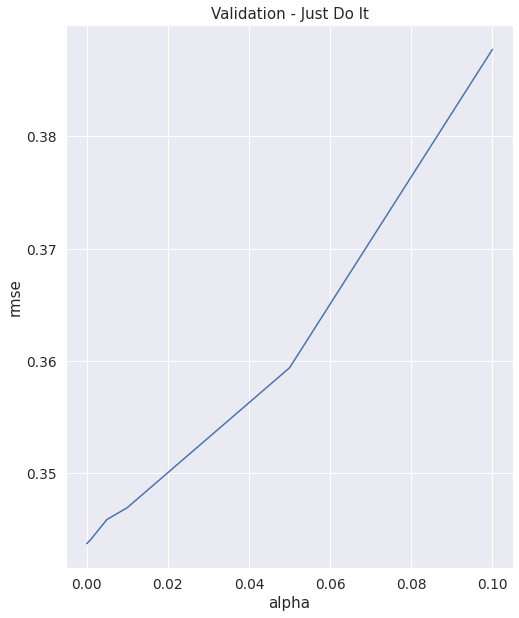

In [19]:
alphas = [
    0.00000001,
    0.0000001,
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.005,
    0.01,
    0.05,
    0.1,
]
cv_lasso = [rmse_cv(Lasso(alpha=alpha),scaled_datos_training_rn, resultados_training_rn).mean() for alpha in alphas]

cv_lasso_serie = pd.Series(cv_lasso, index=alphas)
cv_lasso_serie.plot(title="Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [20]:
cv_lasso_serie.min()

0.34375621220790126

El error minimo con Lasso es minimamente menor al error con Ridge. Este error se alcanza con alpha = 0.

In [21]:
model_lasso = Lasso(alpha=np.array(alphas)[cv_lasso == cv_lasso_serie.min()])
model_lasso.fit(scaled_datos_training_rn, resultados_training_rn)




Lasso(alpha=array([1.e-05]))

Text(0.5, 1.0, 'Coeficientes en el Modelo Lasso ')

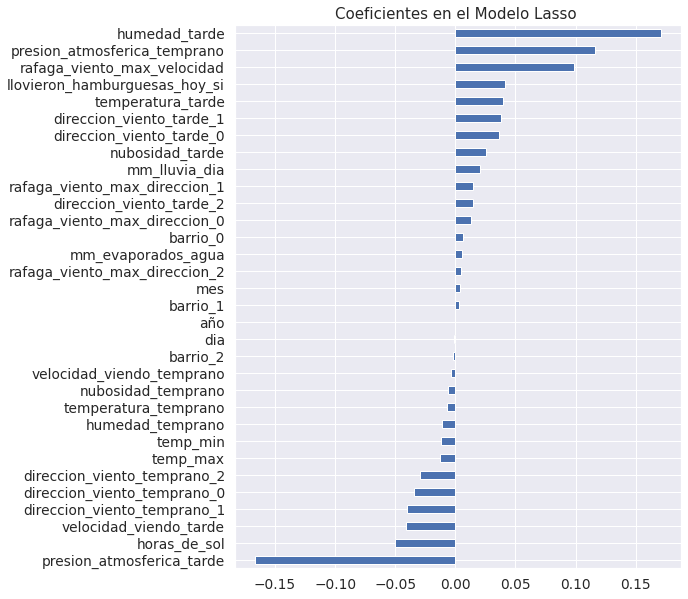

In [22]:
coef = pd.Series(model_lasso.coef_, index=scaled_datos_training_rn.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo Lasso ")



Aca notamos que los features destacados coinciden con los de Ridge

#ElasticNet

Nos fijamos si con elasticnet logramos una mejor regularizacion.

Text(0, 0.5, 'rmse')

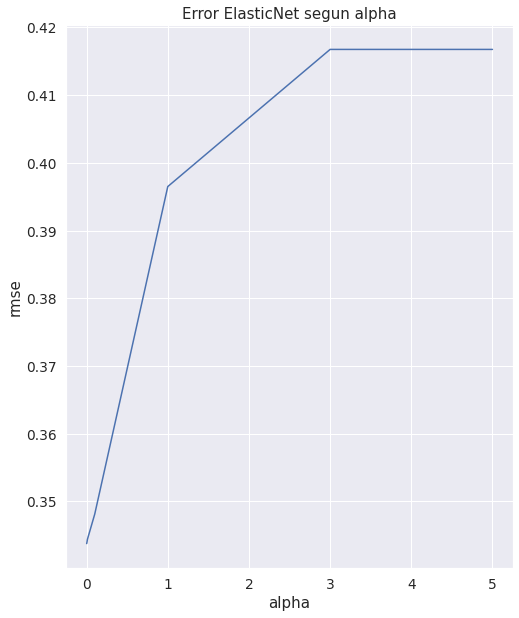

In [23]:
alphas = [0.00001, 0.0001, 0.001, 0.005,0.01,0.1,1,3,5]

cv_elasticNet = [
    rmse_cv(ElasticNet(alpha=alpha, l1_ratio=0.1), scaled_datos_training_rn, resultados_training_rn).mean()
    for alpha in alphas
]

cv_elasticNet = pd.Series(cv_elasticNet, index=alphas)
cv_elasticNet.plot(title="Error ElasticNet segun alpha")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [24]:
cv_elasticNet.min()

0.34375620925715034

Intentando con distintos ratios, no logramos disminuir el error con ElasticNet.

In [25]:
elastic = ElasticNet(alpha=0, l1_ratio=0.1)
elastic.fit(scaled_datos_training_rn, resultados_training_rn)

coeficientes = pd.DataFrame(
    {'Feature': scaled_datos_training_rn.columns, 'Beta': elastic.coef_}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

,Feature,Beta
8,presion_atmosferica_tarde,-0.167151
1,horas_de_sol,-0.050076
15,velocidad_viendo_tarde,-0.040923
25,direccion_viento_temprano_1,-0.040696
24,direccion_viento_temprano_0,-0.034657
26,direccion_viento_temprano_2,-0.029690
11,temp_max,-0.013365
12,temp_min,-0.011584
3,humedad_temprano,-0.010787
14,temperatura_temprano,-0.007208


Text(0.5, 1.0, 'Coeficientes en el Modelo ElasticNet ')

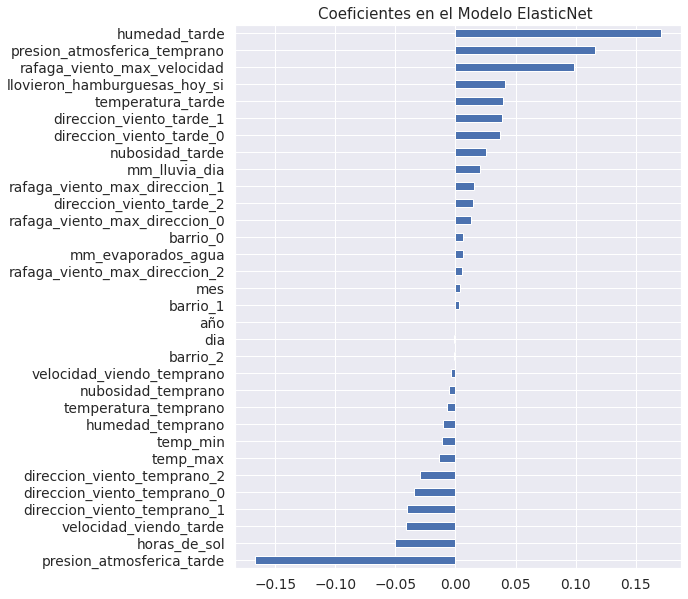

In [26]:
coef = pd.Series(elastic.coef_, index=scaled_datos_training_rn.columns)
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Coeficientes en el Modelo ElasticNet ")


ElasticNet tambien presenta los mismos resultados que Ridge y Lasso

#Seleccion de features

Con el analisis anterior logramos destacar 5 variables que son las que decidimos utilizar en el dataframe. Vamos a entrenar dos veces, una vez rellenando los missings con el promedio de esa columna y otra rellenando los missings con un imputer.

In [14]:
from preprocessing import preprocessing_imputer_filtered
imputed_reduced_datos_training_rn, imputed_reduced_datos_val_dev_rn = preprocessing_imputer_filtered(datos_training.copy(), X_val_dev.copy())

reduced_datos_training_rn = datos_training_rn.filter(items=['humedad_tarde', 'presion_atmosferica_temprano', 'rafaga_viento_max_velocidad', 'presion_atmosferica_tarde', 'horas_de_sol'])
reduced_datos_val_dev_rn = datos_val_dev_rn.filter(items=['humedad_tarde', 'presion_atmosferica_temprano', 'rafaga_viento_max_velocidad', 'presion_atmosferica_tarde', 'horas_de_sol'])

#Parámetros 

Arrancamos con entrenar rellenando los missings con el promedio

In [32]:
def create_model(neurons = 1, activation='relu', optimizer='adam'):

    model = Sequential()
    model.add(Dense(neurons, input_dim=5, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=1000, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
neurons = np.arange(1,500,5)
epochs = [5,25,50,75,100,200,500]
batch_size= [20,50,100, 250, 500, 750, 1000, 2000]
param_dist = dict(activation=activation, neurons=neurons, optimizer=optimizer, epochs=epochs, batch_size=batch_size)
rgscv = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='roc_auc', n_jobs=-1, cv=3, return_train_score=True, random_state=117, verbose=1).fit(reduced_datos_training_rn, resultados_training_rn.to_numpy())
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best score: 0.8434130093849518
Best params {'optimizer': 'Nadam', 'neurons': 386, 'epochs': 75, 'batch_size': 500, 'activation': 'relu'}


Elegimos a scoring como precision ya que nos fijaremos en el AUC ROC a la hora de comparar modelos, y el area abajo de la curva ROC aumenta cuanto mas True Positives tenemos y menos False Positives.

In [15]:
def kfold(clf, X, y):
  kf = StratifiedKFold(n_splits=5)
  test_accuracies = []
  for fold_idx, (train_index, test_index) in enumerate(kf.split(X,y)):
    clf.fit(X[train_index], y[train_index])
    pred = clf.predict(X[test_index])
    pred[pred <= 0.5] = 0.
    pred[pred > 0.5] = 1.
    test_accuracy = accuracy_score(y[test_index], pred)
    print(f"fold {fold_idx}: accuracy score is {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)
  print(f"mean test accuracy is: {np.mean(test_accuracies):.4f}")

In [20]:
m2 = Sequential()
m2.add(Dense(386, input_dim=5, activation='relu'))
m2.add(Dense(1, activation='sigmoid'))

m2.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])
m2.summary()

kfold(m2, reduced_datos_training_rn.to_numpy(), resultados_training_rn.to_numpy())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 386)               2316      
                                                                 
 dense_3 (Dense)             (None, 1)                 387       
                                                                 
Total params: 2,703
Trainable params: 2,703
Non-trainable params: 0
_________________________________________________________________
2048/2048 [==============================] - 8s 3ms/step - loss: 2.0675 - accuracy: 0.7464
fold 0: accuracy score is 0.6785
2048/2048 [==============================] - 5s 2ms/step - loss: 1.2138 - accuracy: 0.7663
fold 1: accuracy score is 0.7591
2048/2048 [==============================] - 4s 2ms/step - loss: 0.8527 - accuracy: 0.7750
fold 2: accuracy score is 0.3259
2048/2048 [==============================] - 4s 2ms/step - loss: 0.6514 - ac

#Entrenamiento y predicción val_dev

In [21]:
m2.fit(reduced_datos_training_rn, resultados_training_rn, epochs=75, batch_size=500, verbose=0)

In [23]:
y_pred_rn = m2.predict(reduced_datos_val_dev_rn)
y_pred_rn_proba = y_pred_rn.copy()
y_pred_rn[y_pred_rn <= 0.5] = 0.
y_pred_rn[y_pred_rn > 0.5] = 1.

contador = 0
for i in range(0,len(resultados_val_dev_rn)):
    if resultados_val_dev_rn.to_numpy()[i] == y_pred_rn[i]:
        contador += 1
               
               
print(contador/len(resultados_val_dev_rn))

0.8263481828839391


#Métricas

In [24]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

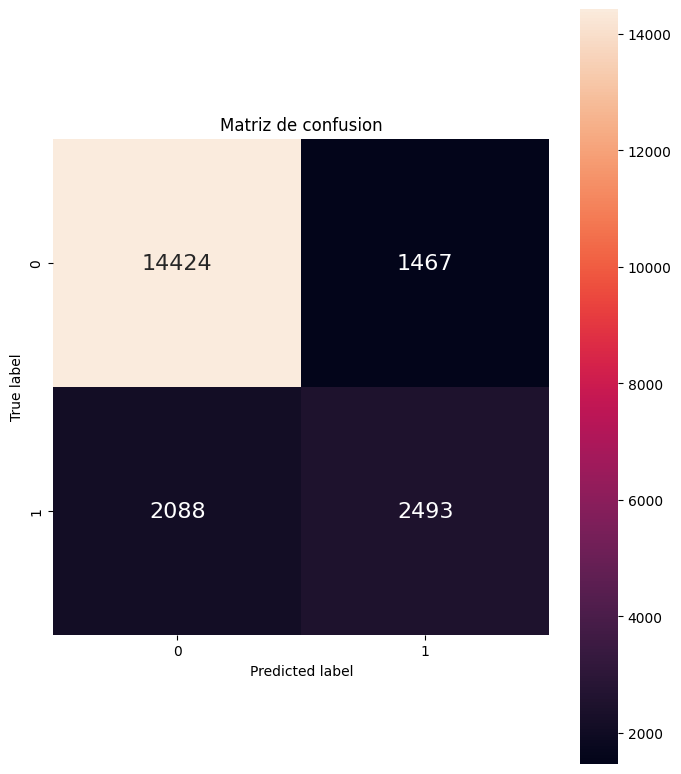

In [25]:
plot_confusion_matrix(resultados_val_dev_rn, y_pred_rn)

In [26]:
print(classification_report(resultados_val_dev_rn, y_pred_rn))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15891
           1       0.63      0.54      0.58      4581

    accuracy                           0.83     20472
   macro avg       0.75      0.73      0.74     20472
weighted avg       0.82      0.83      0.82     20472



In [27]:
def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

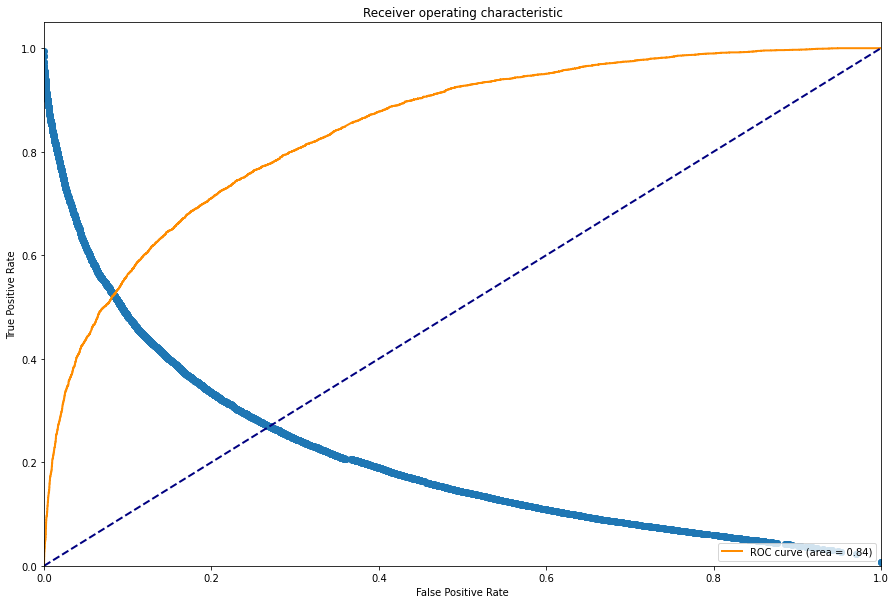

0.8430256378069816

In [28]:
fpr, tpr, thresholds = roc_curve(resultados_val_dev_rn, y_pred_rn_proba)

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val_dev_rn, y_pred_rn_proba))

Nos dio que el area debajo de la curva es de 0.8430256378069816 y el accuracy 0.8263481828839391.

Ahora entrenamos igual que recien solo que habiendo rellenado los missings con un iterative imputer.

#Parámetros 2

In [45]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=1000, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
neurons = np.arange(1,500,5)
epochs = [5,25,50,75,100,200,500]
batch_size= [20,50,100, 250, 500, 750, 1000, 2000]
param_dist = dict(activation=activation, neurons=neurons, optimizer=optimizer, epochs=epochs, batch_size=batch_size)
rgscv = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='roc_auc', n_jobs=-1, cv=3, return_train_score=True, random_state=117, verbose=1).fit(imputed_reduced_datos_training_rn, resultados_training_rn.to_numpy())
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best score: 0.8436029816036997
Best params {'optimizer': 'Adam', 'neurons': 51, 'epochs': 200, 'batch_size': 50, 'activation': 'relu'}


In [29]:
mp = Sequential()
mp.add(Dense(51, input_dim=5, activation='relu'))
mp.add(Dense(1, activation='sigmoid'))

mp.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
mp.summary()
kfold(mp, imputed_reduced_datos_training_rn, resultados_training_rn.to_numpy())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 51)                306       
                                                                 
 dense_5 (Dense)             (None, 1)                 52        
                                                                 
Total params: 358
Trainable params: 358
Non-trainable params: 0
_________________________________________________________________
2048/2048 [==============================] - 5s 2ms/step - loss: 0.7540 - accuracy: 0.7977
fold 0: accuracy score is 0.7746
2048/2048 [==============================] - 4s 2ms/step - loss: 0.5219 - accuracy: 0.7979
fold 1: accuracy score is 0.8136
2048/2048 [==============================] - 3s 2ms/step - loss: 0.5127 - accuracy: 0.7997
fold 2: accuracy score is 0.7954
2048/2048 [==============================] - 4s 2ms/step - loss: 0.5146 - accura

#Entrenamiento y predicción val_dev 2

In [30]:
mp.fit(imputed_reduced_datos_training_rn, resultados_training_rn, epochs=200, batch_size=50, verbose=0)

In [31]:
y_pred_rn = mp.predict(imputed_reduced_datos_val_dev_rn)
y_pred_rn_proba2 = y_pred_rn.copy()
y_pred_rn[y_pred_rn <= 0.5] = 0.
y_pred_rn[y_pred_rn > 0.5] = 1.

contador = 0
for i in range(0,len(resultados_val_dev_rn)):
    if resultados_val_dev_rn.to_numpy()[i] == y_pred_rn[i]:
        contador += 1
               
               
print(contador/len(resultados_val_dev_rn))

0.8354337631887456


#Métricas 2

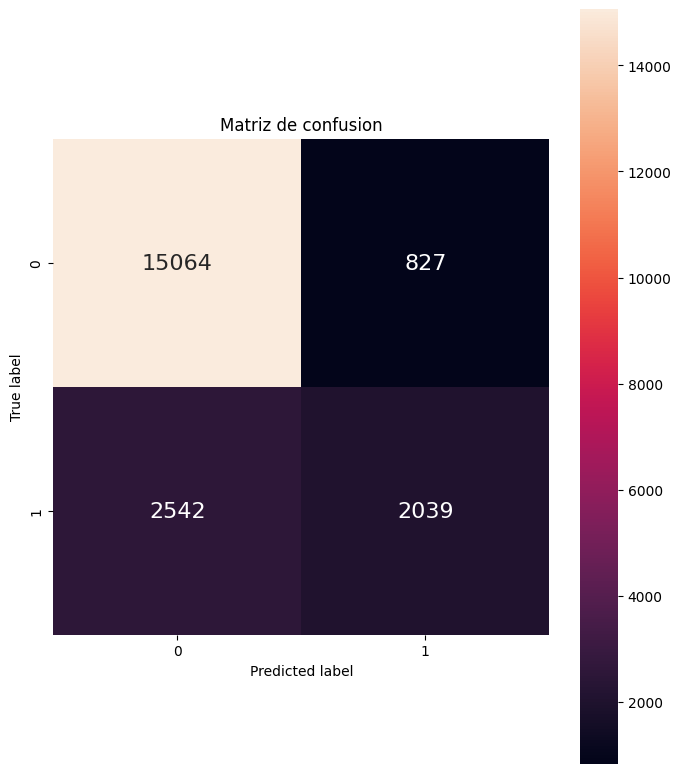

In [32]:
plot_confusion_matrix(resultados_val_dev_rn, y_pred_rn)

In [33]:
print(classification_report(resultados_val_dev_rn, y_pred_rn))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15891
           1       0.71      0.45      0.55      4581

    accuracy                           0.84     20472
   macro avg       0.78      0.70      0.72     20472
weighted avg       0.82      0.84      0.82     20472



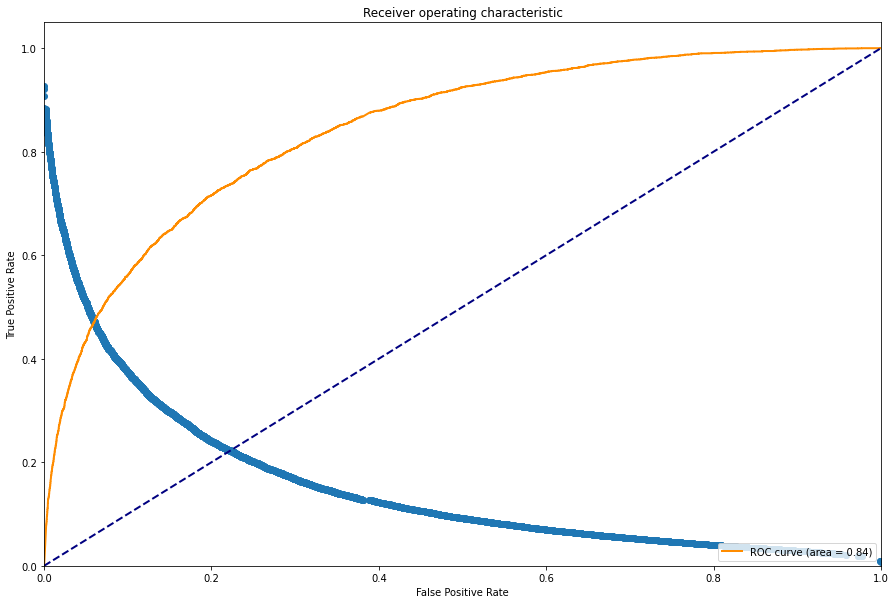

0.8438734100904147

In [34]:
fpr, tpr, thresholds = roc_curve(resultados_val_dev_rn, y_pred_rn_proba2)

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val_dev_rn, y_pred_rn_proba2))

Los dos modelos dieron un accuracy muy parecidos, pero el area debajo de la curva aumentó y como esta es la metrica que nos interesa, decidimos usar este modelo de redes neuronales para predecir el ultimo dataframe.

#Predicciones sobre el test-holdout

In [39]:
_datos_training, datos_test = preprocessing_imputer_filtered(datos_training.copy(), X_test_holdout.copy())

resultados_test = y_test_holdout.copy()
resultados_test = resultados_test.reset_index()
resultados_test = resultados_test.drop(columns=['index'])
resultados_test = pd.get_dummies(resultados_test, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

pd.DataFrame(datos_test)

,0,1,2,3,4
0,69.0,1026.1,33.0,1023.000000,5.494425
1,31.0,1020.0,31.0,1017.400024,10.132747
2,49.0,1013.8,31.0,1012.200012,13.800000
3,31.0,1016.5,33.0,1011.700012,12.400000
4,47.0,1023.4,28.0,1022.200012,9.200000
...,...,...,...,...,...
11368,32.0,1025.2,31.0,1022.799988,9.904913
11369,94.0,1007.0,69.0,1003.000000,2.037616
11370,64.0,1016.5,24.0,1015.799988,0.000000
11371,58.0,1026.0,24.0,1024.000000,8.400000


In [41]:
y_pred = mp.predict(datos_test)
y_pred_proba = y_pred.copy()
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

In [42]:
accuracy_score(y_pred, resultados_test)

0.839620152993933

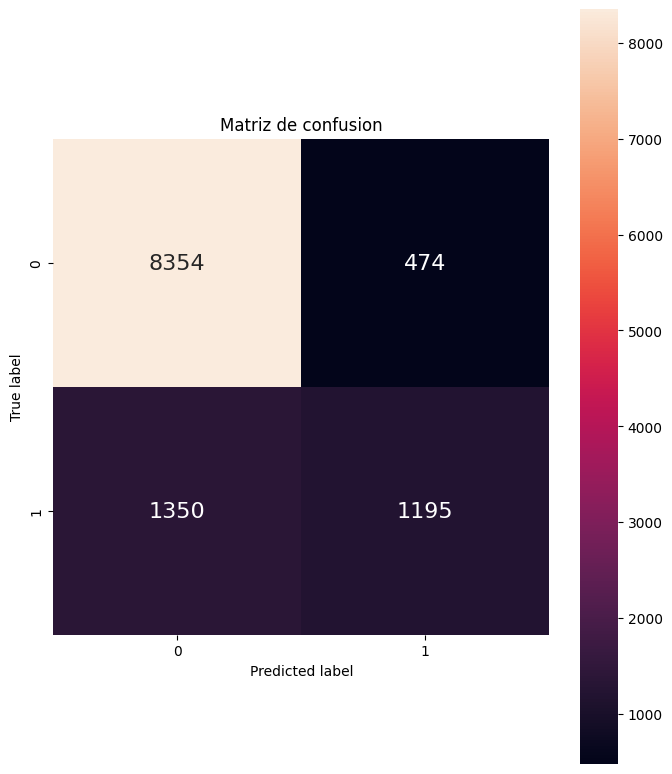

In [43]:
plot_confusion_matrix(resultados_test.to_numpy(), y_pred)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(resultados_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8828
           1       0.72      0.47      0.57      2545

    accuracy                           0.84     11373
   macro avg       0.79      0.71      0.73     11373
weighted avg       0.83      0.84      0.83     11373



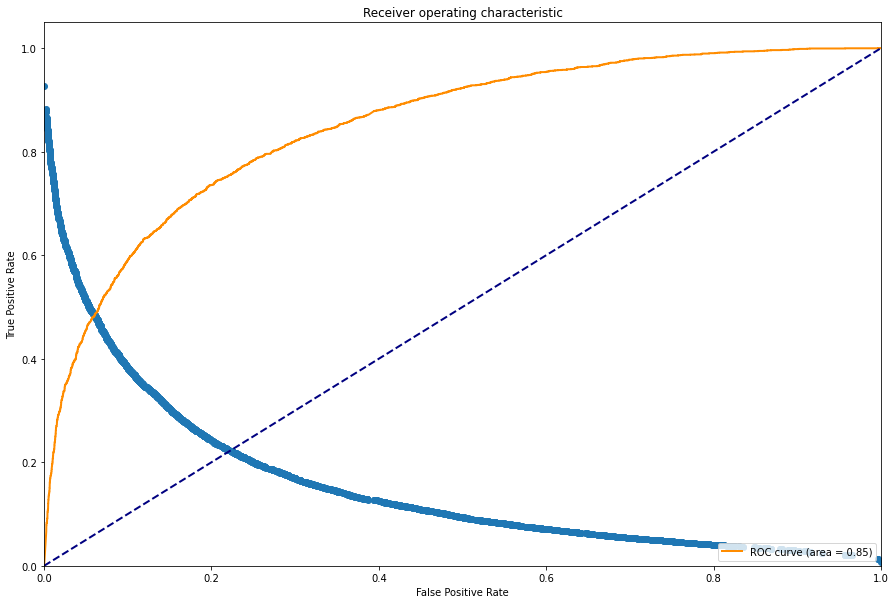

0.850181486304961

In [45]:
fpr, tpr, thresholds = roc_curve(resultados_test.to_numpy(), y_pred_proba)

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_test.to_numpy(), y_pred_proba))

#Predicción final

In [35]:
datos_prediccion = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8/export?format=csv', low_memory=False
)
datos_prediccion

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Villa General Mitre,2014-12-16,Oestesuroeste,Sursureste,13.4,38.0,51.0,116706,NaN,NaN,...,1010.9,1014.4,suroeste,41.0,26.8,8.9,24.9,20.6,28.0,13.0
1,Nueva Pompeya,2010-10-21,Nornoreste,Estesureste,NaN,39.0,57.0,58831,no,NaN,...,1020.2,1023.8,Norte,28.0,23.3,5.0,21.5,14.7,11.0,6.0
2,Constitución,2013-04-09,Estesureste,Oestenoroeste,3.6,73.0,90.0,31981,si,2.4,...,1024.3,1026.7,Oestenoroeste,24.0,22.0,15.6,20.7,16.7,6.0,15.0
3,Agronomía,2016-02-05,Sureste,Sureste,NaN,34.0,47.0,2533,no,NaN,...,1015.8,1018.3,Sureste,30.0,29.9,14.2,27.0,20.0,11.0,15.0
4,Balvanera,2012-06-05,suroeste,Noroeste,NaN,77.0,87.0,7270,no,2.0,...,1007.6,1006.0,suroeste,39.0,11.5,5.5,11.2,7.0,20.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,Parque Chas,2013-04-24,suroeste,Oestenoroeste,NaN,71.0,77.0,73456,no,NaN,...,1018.9,1021.2,Oeste,37.0,19.8,9.8,17.3,12.8,9.0,13.0
29088,Belgrano,2015-10-30,Norte,Noreste,NaN,37.0,64.0,14471,no,NaN,...,1017.9,1021.8,Nornoreste,41.0,29.3,15.6,27.8,20.2,15.0,28.0
29089,Villa Crespo,2011-08-09,Nornoreste,Norte,10.1,31.0,77.0,106482,no,3.2,...,1011.1,1016.3,suroeste,41.0,19.8,5.5,18.6,11.1,20.0,11.0
29090,Caballito,2017-04-25,Nornoreste,Norte,NaN,81.0,90.0,21057,no,NaN,...,1008.2,1014.6,Nornoreste,39.0,25.4,17.8,22.0,19.5,33.0,15.0


In [36]:
_datos_training, X = preprocessing_imputer_filtered(datos_training.copy(), datos_prediccion)
predicciones_rn = mp.predict(X)
predicciones_rn[predicciones_rn <= 0.5] = 0.
predicciones_rn[predicciones_rn > 0.5] = 1.

predicciones_rn = pd.DataFrame(predicciones_rn).rename(columns= {0:'llovieron_hamburguesas_al_dia_siguiente'})
predicciones_rn.replace(0, 'no', inplace= True)
predicciones_rn.replace(1, 'si', inplace= True)
predicciones_rn

,llovieron_hamburguesas_al_dia_siguiente
0,no
1,no
2,no
3,no
4,no
...,...
29087,no
29088,no
29089,no
29090,si


In [37]:
predicciones_rn.to_csv("Redes_Neuronales.csv")